## Lending Club Case Study
### Developed By -->  1. Rajashree Roy   2. Pritam Mukherjee

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Data Loading and Understanding

In [3]:
# Reading loan csv file and observing the data.
raw_df = pd.read_csv("loan.csv")
raw_df.head(3)

C:\Users\z004a8ac\AppData\Local\Temp\ipykernel_19032\727734610.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Observing the data
raw_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [8]:
# Observing the data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


##### Data Cleaning and Manipulation

In [91]:
#column with index 47 having mixed data type 
#column name found = next_pymnt_d . Has null values
raw_df.iloc[:,47].name
raw_df.iloc[:,47].head(5)

0       NaN
1       NaN
2       NaN
3       NaN
4    Jun-16
Name: next_pymnt_d, dtype: object

In [92]:
# data converted into suitable format along with imputation
## null value imputation for next_pymnt_d,last_pymnt_d,last_credit_pull_d
## datetime format change for next_pymnt_d,last_pymnt_d,last_credit_pull_d,issue_d,earliest_cr_line

raw_df['next_pymnt_d'] = raw_df['next_pymnt_d'].fillna('Jan-00')
raw_df['next_pymnt_d'] = pd.to_datetime(raw_df['next_pymnt_d'], format='%b-%y')
raw_df['next_pymnt_d'] = raw_df['next_pymnt_d'].dt.strftime('%d-%m-%Y')  

raw_df['last_pymnt_d'] = raw_df['last_pymnt_d'].fillna('Jan-00')
raw_df['last_pymnt_d'] = pd.to_datetime(raw_df['last_pymnt_d'], format='%b-%y')
raw_df['last_pymnt_d'] = raw_df['last_pymnt_d'].dt.strftime('%d-%m-%Y')

raw_df['last_credit_pull_d'] = raw_df['last_credit_pull_d'].fillna('Jan-00')
raw_df['last_credit_pull_d'] = pd.to_datetime(raw_df['last_credit_pull_d'], format='%b-%y')
raw_df['last_credit_pull_d'] = raw_df['last_credit_pull_d'].dt.strftime('%d-%m-%Y')

raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'], format='%b-%y')
raw_df['issue_d'] = raw_df['issue_d'].dt.strftime('%d-%m-%Y')

raw_df['earliest_cr_line'] = pd.to_datetime(raw_df['earliest_cr_line'], format='%b-%y')
raw_df['earliest_cr_line'] = raw_df['earliest_cr_line'].dt.strftime('%d-%m-%Y')


In [94]:
#renaming the column for better understaning the meaning

raw_df.rename(columns={'annual_inc':'annual_income','emp_length':'employement_span_in_years',
                       'total_acc':'total_credit_line','int_rate':'interest_rate',
                       'pub_rec':'derogatory_rec'}, inplace=True)


In [95]:
#data checking for column emp_length
raw_df["employement_span_in_years"].head(3)

0    10+ years
1     < 1 year
2    10+ years
Name: employement_span_in_years, dtype: object

In [96]:
# cleaning the 'emp_length' column as per data dictionary
raw_df["employement_span_in_years"] = raw_df["employement_span_in_years"].fillna('0').str.replace(r'< 1', '0', regex=True).str.replace(r'\D+', '', regex=True).astype('int')
raw_df["employement_span_in_years"].head(3)

0    10
1     0
2    10
Name: employement_span_in_years, dtype: int32

In [97]:
# checking unique record after manupulation
set(raw_df['employement_span_in_years'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [98]:
# cleaning the 'interest_rate' column
raw_df["interest_rate"] = raw_df["interest_rate"].str.replace(r'%', '', regex=True).astype('float')
raw_df["interest_rate"].head(3)

0    10.65
1    15.27
2    15.96
Name: interest_rate, dtype: float64

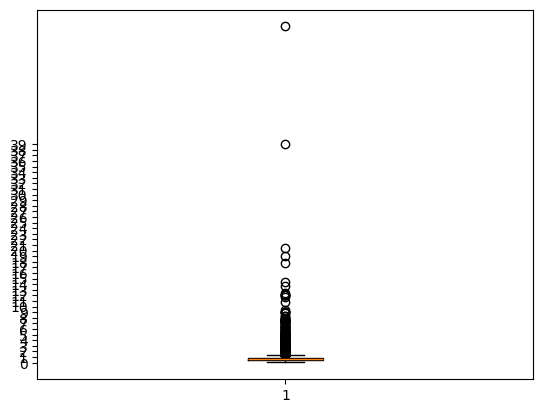

In [99]:
# finding outliers in annual_income column
y = np.arange(0, 4000000, 100000)
labels = ["{}".format(i//100000) for i in y]
plt.boxplot(raw_df['annual_income'])
plt.yticks(y,labels)
plt.show()

In [100]:
raw_df['annual_income'].quantile([.25,.50,.75,.90,.95,.98,.99,1])


0.25      40404.00
0.50      59000.00
0.75      82300.00
0.90     116000.00
0.95     142000.00
0.98     187000.00
0.99     234999.36
1.00    6000000.00
Name: annual_income, dtype: float64

In [101]:
#removing the outliers from annual income by considering data till 99%
df = raw_df[raw_df['annual_income'] <= 234999.36]
df['annual_income'].mean() #65524
df['annual_income'].median() #58000

58000.0

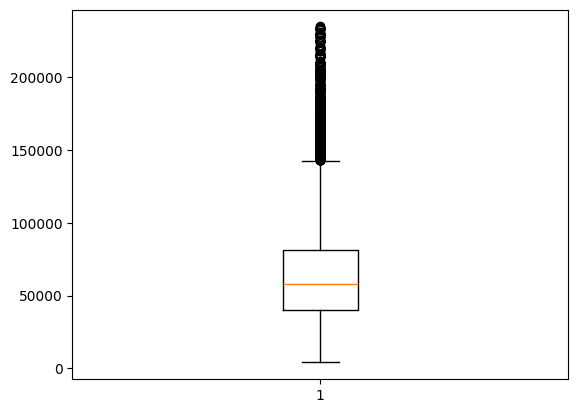

In [102]:
# proof of - outliers removed
plt.boxplot(df['annual_income'])
plt.show()

In [103]:
# Creating data frame charged_off contaning only defaulter's data
charged_off = df[df['loan_status']=='Charged Off']

## Univariate Analysis

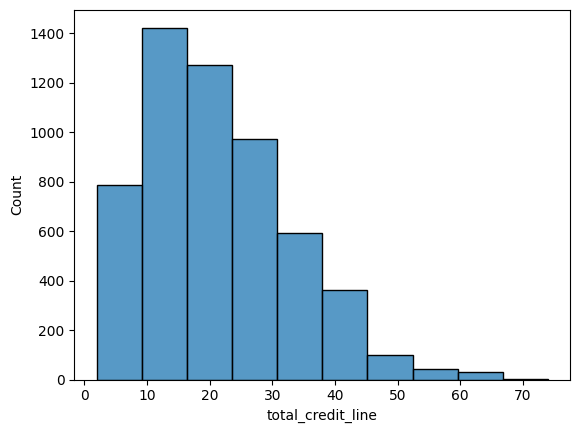

In [104]:
# people having 10-20 credit lines are prone to default
sns.histplot(charged_off['total_credit_line'], bins= 10)
plt.show()

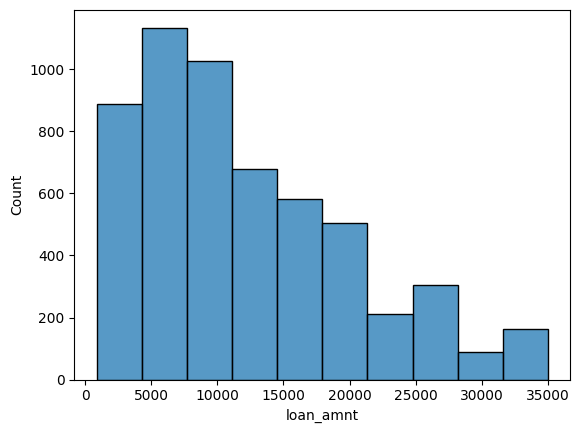

In [105]:
# hereby we can analyse, people taking loan in a range of Rs.5000-Rs.10,000 are prone to default

sns.histplot(charged_off['loan_amnt'],bins=10)
plt.show()

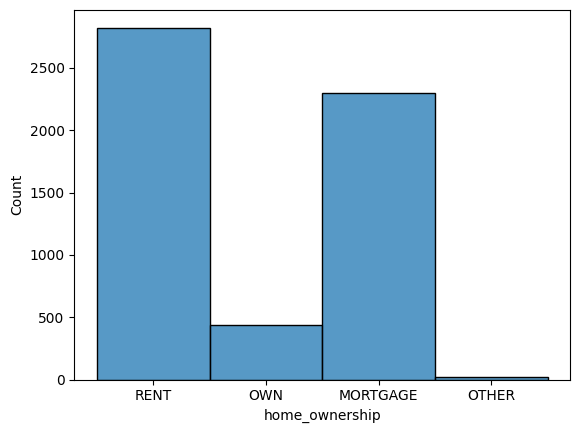

In [106]:
# hereby we can analyse, people staying in rent or having Mortgage are prone to default
sns.histplot(charged_off['home_ownership'])
plt.show()

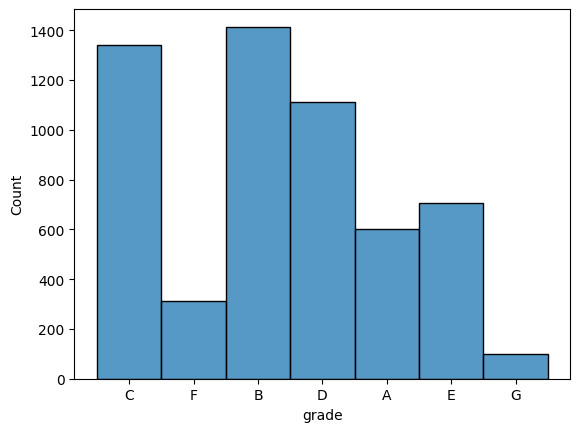

In [107]:
# hereby we can analyse, people in grade B,C,D are more prone to default
sns.histplot(charged_off['grade'])
plt.show()

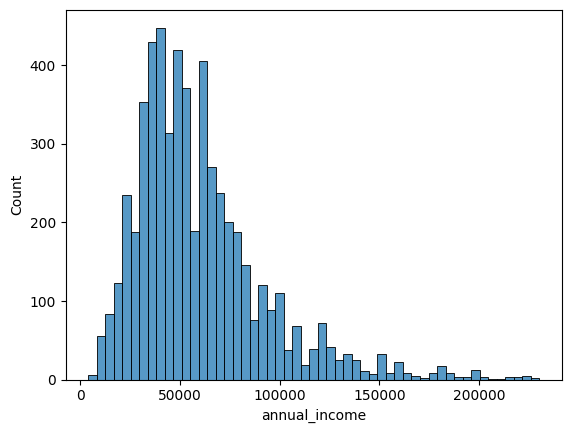

In [108]:
# From the below graph it is clear that maximum default cases are 
# for annual income between 40000 to 80000
sns.histplot(charged_off['annual_income'])
plt.show()

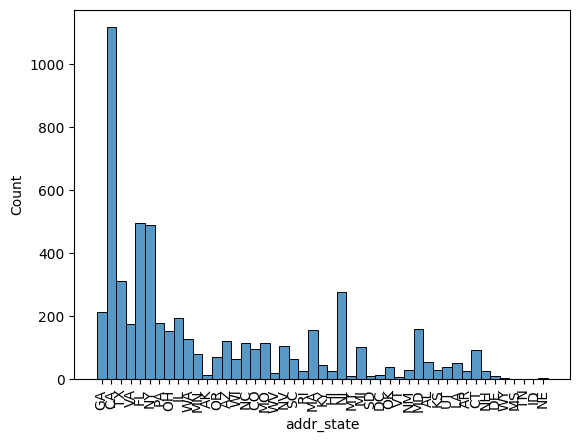

In [109]:
# From the below graph it is clear that maximum default cases are coming from CA state.
sns.histplot(charged_off['addr_state'])
plt.xticks(rotation=90)
plt.show()

## Segmented Univariate Analysis

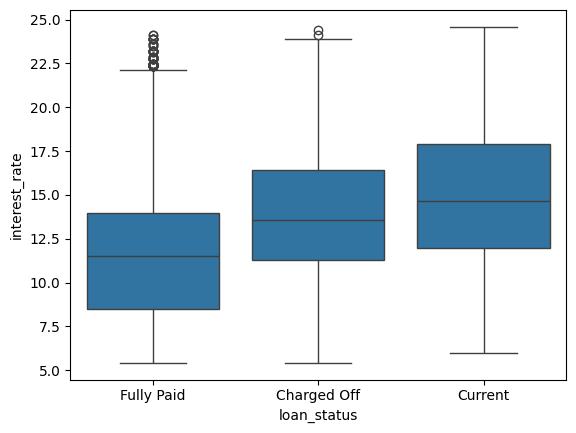

In [110]:
# analysing defaulters on basis of interest rate
sns.boxplot(x=df['loan_status'],y=df['interest_rate'])
plt.show()

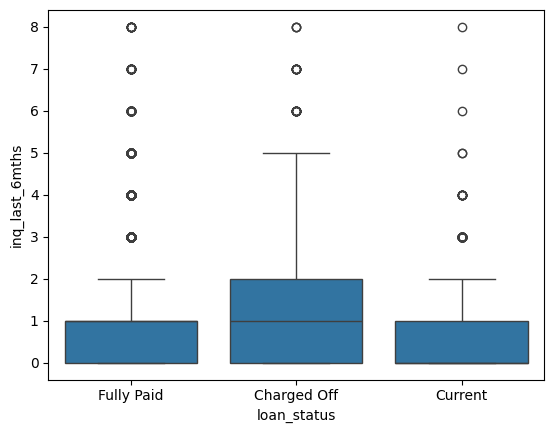

In [111]:
# analysing defaulters based on the number of enquires made in last 6 month
sns.boxplot(x=df['loan_status'],y=df['inq_last_6mths'])
plt.show()

## Bivariate Analysis

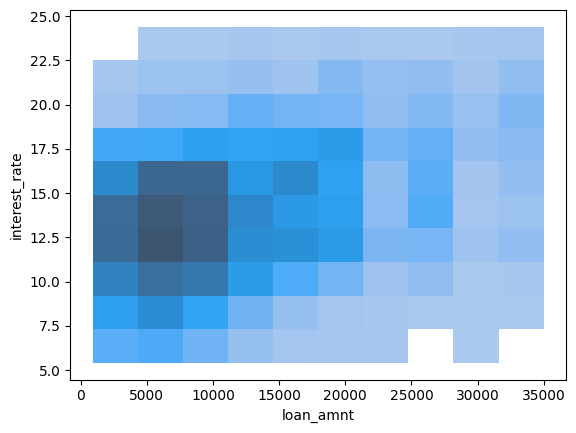

In [112]:
# From below analysis we can conclude, loan amount between 5000-10000 having interest rate 
# between 11%-16% has high chance to default.
sns.histplot(data=charged_off,x='loan_amnt',y='interest_rate',bins=10)
plt.show()

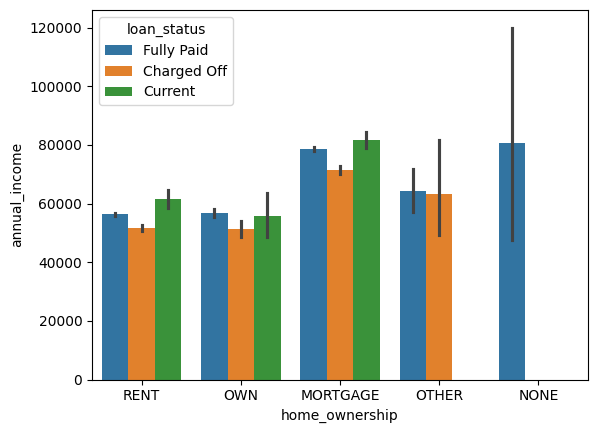

In [113]:
# This analysis shows, if annual_income is more and home ownership is Mortgage, 
# chance of making defaults are high.
sns.barplot(data=df,y='annual_income',x='home_ownership',hue='loan_status')
plt.show()

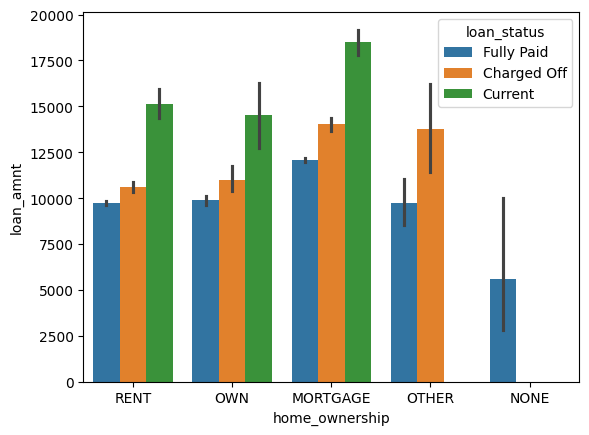

In [114]:
# This analysis shows, if Loan_amnt is more and home ownership is Mortgage or other, 
# chance of making defaults are high.
sns.barplot(data=df,y='loan_amnt',x='home_ownership',hue='loan_status')
plt.show()

## Derived Metrics

In [125]:
# Deriving loan issued year from issue_d column
charged_off['issue_d_year'] = pd.DatetimeIndex(charged_off['issue_d']).year
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year


C:\Users\z004a8ac\AppData\Local\Temp\ipykernel_14052\3213175469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off['issue_d_year'] = pd.DatetimeIndex(charged_off['issue_d']).year
C:\Users\z004a8ac\AppData\Local\Temp\ipykernel_14052\3213175469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year


In [118]:
# Checking distinct years available in the dataset
set(charged_off['issue_d_year'])

{2007, 2008, 2009, 2010, 2011}

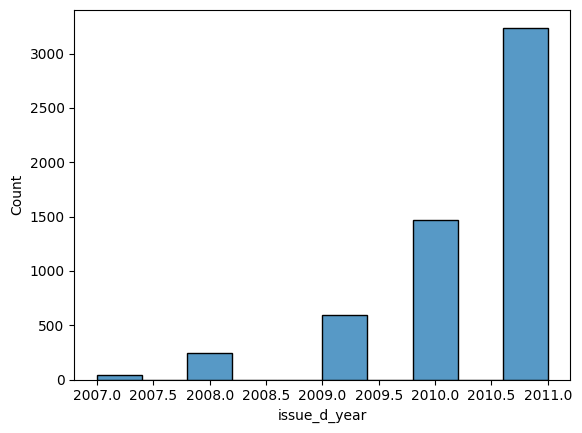

In [122]:
# Defaulter's count increased year wise and most default happened in 2011
sns.histplot(charged_off['issue_d_year'], bins=10)
plt.show()

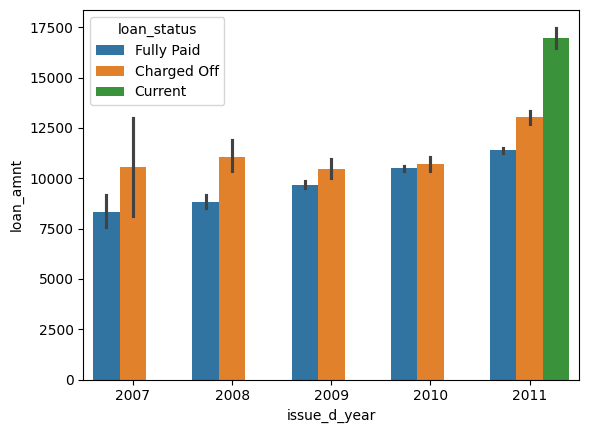

In [130]:
# defaulters increased as loan amount increased every year
sns.barplot(data=df,y='loan_amnt',x='issue_d_year', hue='loan_status')
plt.show()